In [152]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [153]:
LIST_OF_STAGE_II_COUNTRIES = pd.read_csv("../../../data/UN/fertility/countries_in_stage_II.csv")
TFR_OF_STAGE_II_COUNTRIES = pd.read_csv("../../../data/UN/fertility/TFR_per_country_stage_II.csv")

MC_SIMULATIONS_PREFIX = "./MC_fertility_"

REGION_OF_INTEREST = "Mozambique"

TFR_OF_INTEREST = TFR_OF_STAGE_II_COUNTRIES[TFR_OF_STAGE_II_COUNTRIES["Region"] == REGION_OF_INTEREST]

MC_SIMULATIONS_FILE = MC_SIMULATIONS_PREFIX + REGION_OF_INTEREST + ".pkl"
with open(MC_SIMULATIONS_FILE, "rb") as handle:
    MC_SIMULATIONS = pickle.load(handle)

N_samples = len(MC_SIMULATIONS)
simulation_len = len(MC_SIMULATIONS[0].path) - 1
simulation_start = TFR_OF_INTEREST['Year'].iloc[-1]
simulation_end = simulation_start + simulation_len + 1
simulation_window = np.arange(simulation_start, simulation_end, 1)

MC_SIMULATIONS_path = [MC_SIMULATIONS[i].path for i in range(N_samples)]

FileNotFoundError: [Errno 2] No such file or directory: '../../../data/UN/fertility/countries_in_stage_II.csv'

In [ ]:
plt.plot(TFR_OF_INTEREST['Year'], TFR_OF_INTEREST['TFR'])
for path in MC_SIMULATIONS_path:
    plt.plot(simulation_window, path[:])
plt.title(
    f"History & Simulation of the TFR rate for {REGION_OF_INTEREST} between {int(TFR_OF_INTEREST['Year'].iloc[0])} and {int(simulation_end)}")
plt.show()

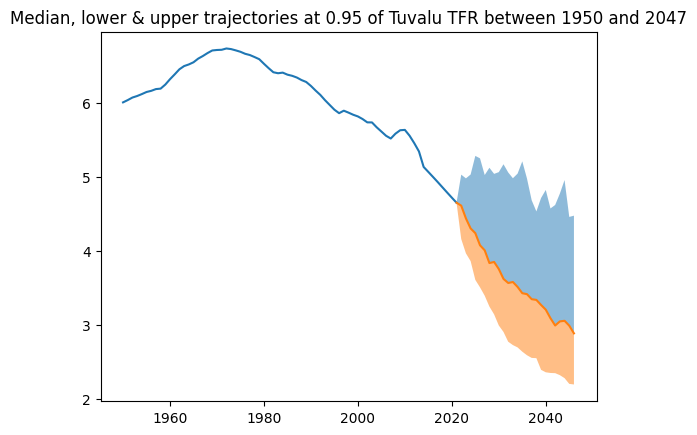

In [154]:
plt.plot(TFR_OF_INTEREST['Year'], TFR_OF_INTEREST['TFR'])
median_trajectory = np.median(MC_SIMULATIONS_path, axis=0)
upper_quantile_95 = np.quantile(MC_SIMULATIONS_path, 0.95, axis=0)
lower_quantile_005 = np.quantile(MC_SIMULATIONS_path, 0.05, axis=0)
plt.plot(simulation_window, median_trajectory)
plt.title(
    f"Median, lower & upper trajectories at 0.95 of {REGION_OF_INTEREST} TFR between {int(TFR_OF_INTEREST['Year'].iloc[0])} and {int(simulation_end)}")
plt.fill_between(simulation_window, median_trajectory, upper_quantile_95, alpha=0.5)
plt.fill_between(simulation_window, median_trajectory, lower_quantile_005, alpha=0.5)
plt.show()

In [155]:
def plot(REGION_OF_INTEREST):
    TFR_OF_INTEREST = TFR_OF_STAGE_II_COUNTRIES[TFR_OF_STAGE_II_COUNTRIES["Region"] == REGION_OF_INTEREST]

    MC_SIMULATIONS_FILE = MC_SIMULATIONS_PREFIX + REGION_OF_INTEREST + ".pkl"
    with open(MC_SIMULATIONS_FILE, "rb") as handle:
        MC_SIMULATIONS = pickle.load(handle)

    N_samples = len(MC_SIMULATIONS)
    simulation_len = len(MC_SIMULATIONS[0].path) - 1
    simulation_start = TFR_OF_INTEREST['Year'].iloc[-1]
    simulation_end = simulation_start + simulation_len + 1
    simulation_window = np.arange(simulation_start, simulation_end, 1)

    MC_SIMULATIONS_path = [MC_SIMULATIONS[i].path for i in range(N_samples)]
    plt.plot(TFR_OF_INTEREST['Year'], TFR_OF_INTEREST['TFR'])

    plt.plot(TFR_OF_INTEREST['Year'], TFR_OF_INTEREST['TFR'])
    median_trajectory = np.median(MC_SIMULATIONS_path, axis=0)
    upper_quantile_95 = np.quantile(MC_SIMULATIONS_path, 0.95, axis=0)
    lower_quantile_005 = np.quantile(MC_SIMULATIONS_path, 0.05, axis=0)
    plt.plot(simulation_window, median_trajectory)
    plt.title(
        f"Median, lower & upper trajectories at 0.95 of {REGION_OF_INTEREST} TFR between {int(TFR_OF_INTEREST['Year'].iloc[0])} and {int(simulation_end)}")
    plt.fill_between(simulation_window, median_trajectory, upper_quantile_95, alpha=0.5)
    plt.fill_between(simulation_window, median_trajectory, lower_quantile_005, alpha=0.5)
    plt.savefig(f"./MC_SIMULATION_{REGION_OF_INTEREST}.png")
    plt.close()


def get_simulations(REGION_OF_INTEREST):
    MC_SIMULATIONS_FILE = MC_SIMULATIONS_PREFIX + REGION_OF_INTEREST + ".pkl"
    with open(MC_SIMULATIONS_FILE, "rb") as handle:
        MC_SIMULATIONS = pickle.load(handle)
    return MC_SIMULATIONS


In [156]:
for REGION_OF_INTEREST in LIST_OF_STAGE_II_COUNTRIES['Region']:
    plot(REGION_OF_INTEREST)

In [248]:
problematique = get_simulations("Least_developed_countries")
OK = get_simulations("Middle-income_countries")

In [249]:
parameters_of_interest = ['delta_c', 't0', 'c1975', 'sigma0', 'S', 'a', 'b', 'phaseIII']


def get_parameters_of_interest(simulations):
    parameters = {i: {param: getattr(simulations[0], param) for param in parameters_of_interest} for i in
                  range(len(simulations))}
    return parameters

In [239]:
params_problematique = get_parameters_of_interest(problematique)
params_OK = get_parameters_of_interest(OK)

In [241]:
params_OK[0]

{'delta_c': (0.15732495115815523,
  1.557682831468118,
  1.5452054176437435,
  2.4083867997299855,
  0.5774437092232453),
 't0': 1950.0,
 'c1975': 1.2474894361234712,
 'sigma0': 0.1335074440938315,
 'S': 5.843440504728494,
 'a': 0.18937694812903383,
 'b': 0.11794239335468881,
 'phaseIII': True}

In [242]:
params_problematique[0]

{'delta_c': (1.7207132618095888,
  3.411963528724898,
  0.007031336237692276,
  1.350041873227818,
  2.499824016864161),
 't0': 1950.0,
 'c1975': 1.6122377040103908,
 'sigma0': 0.04072486127580428,
 'S': 6.424952345025753,
 'a': 0.19099426326221136,
 'b': 0.11005301095020187,
 'phaseIII': True}

In [253]:
get_parameters_of_interest(get_simulations("Niger"))

{0: {'delta_c': (0.5340698012561688,
   2.6827664496805546,
   3.2771637468628994,
   1.0000000022003779,
   1.9388909860691064),
  't0': 1950.0,
  'c1975': 1.1335589002045863,
  'sigma0': 0.11058508575817126,
  'S': 4.113393409556089,
  'a': 0.15278037626243035,
  'b': 0.1189265805266929,
  'phaseIII': True},
 1: {'delta_c': (0.5340698012561688,
   2.6827664496805546,
   3.2771637468628994,
   1.0000000022003779,
   1.9388909860691064),
  't0': 1950.0,
  'c1975': 1.1335589002045863,
  'sigma0': 0.11058508575817126,
  'S': 4.113393409556089,
  'a': 0.15278037626243035,
  'b': 0.1189265805266929,
  'phaseIII': True},
 2: {'delta_c': (0.5340698012561688,
   2.6827664496805546,
   3.2771637468628994,
   1.0000000022003779,
   1.9388909860691064),
  't0': 1950.0,
  'c1975': 1.1335589002045863,
  'sigma0': 0.11058508575817126,
  'S': 4.113393409556089,
  'a': 0.15278037626243035,
  'b': 0.1189265805266929,
  'phaseIII': True},
 3: {'delta_c': (0.5340698012561688,
   2.6827664496805546,
   3

In [251]:
get_parameters_of_interest(get_simulations("Niue"))

{0: {'delta_c': (2.4933617943343123,
   0.011994717695743675,
   1.4524035628178398,
   2.4805899251521057,
   0.25016223786933095),
  't0': 1950.0,
  'c1975': 1.6094483368188142,
  'sigma0': 0.344347094376754,
  'S': 4.170119561372497,
  'a': 0.05418370211243493,
  'b': 0.1643969741835869,
  'phaseIII': True},
 1: {'delta_c': (2.4933617943343123,
   0.011994717695743675,
   1.4524035628178398,
   2.4805899251521057,
   0.25016223786933095),
  't0': 1950.0,
  'c1975': 1.6094483368188142,
  'sigma0': 0.344347094376754,
  'S': 4.170119561372497,
  'a': 0.05418370211243493,
  'b': 0.1643969741835869,
  'phaseIII': True},
 2: {'delta_c': (2.4933617943343123,
   0.011994717695743675,
   1.4524035628178398,
   2.4805899251521057,
   0.25016223786933095),
  't0': 1950.0,
  'c1975': 1.6094483368188142,
  'sigma0': 0.344347094376754,
  'S': 4.170119561372497,
  'a': 0.05418370211243493,
  'b': 0.1643969741835869,
  'phaseIII': True},
 3: {'delta_c': (2.4933617943343123,
   0.011994717695743675,

In [12]:
median_trajectory

array([6.81785   , 6.38409787, 5.78198377, 5.03995214, 3.88365729,
       2.32764703, 0.84038442, 0.82878848, 0.93672027, 1.07289606,
       1.19114925, 1.29515236, 1.36610703, 1.44321039, 1.52967962,
       1.57335201, 1.63172134, 1.67951909, 1.70115738, 1.77170514,
       1.82797638, 1.83214233, 1.85092949, 1.89367222, 1.88976812,
       1.8869252 ])